In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle_zillow
from env import get_db_url
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

looking at log error
1. Is there a correlation between log error and county?
2. Is there a correlation between log error and neighborhood?
3. Is there a correlation between log error and propertylandusedesc?
4. Is there a correlation between log error and roomcnt?
5. Is there a correlation between log error and year built?

In [2]:
# get and prep data using wrangle_zillow.py
df = wrangle_zillow.wrangle_zillow()
df.columns



Reading prepped data from csv...


Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', 'transactiondate',
       'propertylandusedesc'],
      dtype='object')

In [3]:
# what are the correlations between log error and all of the other variables?
df[df.columns[1:]].corr()['logerror']

bathroomcnt                     0.031770
bedroomcnt                      0.035281
calculatedfinishedsquarefeet    0.039703
fips                            0.006253
latitude                       -0.011676
longitude                       0.014544
lotsizesquarefeet               0.011852
propertylandusetypeid          -0.013618
rawcensustractandblock          0.006243
regionidcity                    0.002795
regionidcounty                 -0.015618
regionidzip                     0.002627
roomcnt                         0.015496
yearbuilt                       0.010682
structuretaxvaluedollarcnt      0.004982
taxvaluedollarcnt              -0.001353
assessmentyear                       NaN
landtaxvaluedollarcnt          -0.004282
taxamount                      -0.003160
censustractandblock             0.004802
logerror                        1.000000
Name: logerror, dtype: float64

In [4]:
# change fips to string
df.fips = df.fips.astype(str)
# add the missing leading 0, and keep only the relevant portion
df.fips = "0" + df.fips.str[0:4]

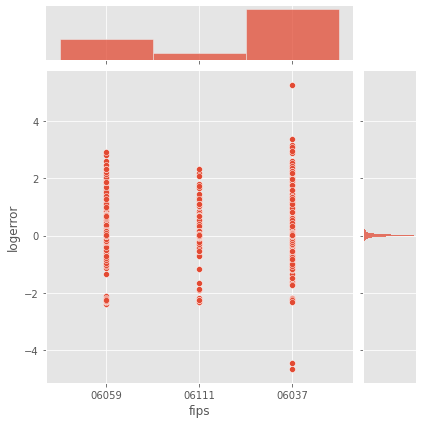

In [5]:
# is there a correlation between log error and county?
sns.jointplot(y='logerror', x='fips', data=df)

Text(0.5, 1.0, 'Mean Log Error by County')

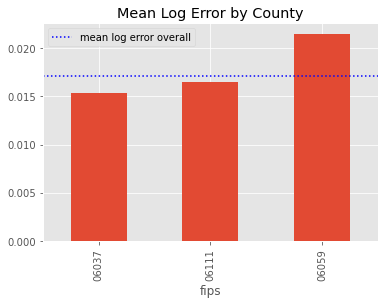

In [6]:
# make a bar chart showing the log error by county
df.groupby('fips').logerror.mean().sort_values().plot(kind='bar')
# add horizontal line at mean log error
plt.axhline(y=df.logerror.mean(), color='b', linestyle=':')
# add legend
plt.legend(['mean log error overall'])
# add title
plt.title('Mean Log Error by County')



Text(0.5, 1.0, 'Median Log Error by County')

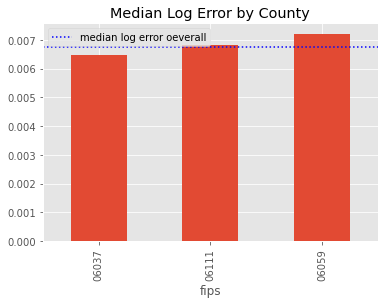

In [7]:
# make a bar chart showing the log error by county
df.groupby('fips').logerror.median().sort_values().plot(kind='bar')
# add horizontal line at median log error
plt.axhline(y=df.logerror.median(), color='b', linestyle=':')
# add legend
plt.legend(['median log error oeverall'])
# add title
plt.title('Median Log Error by County')

## Is there a correlation between log error and city?

In [8]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing two continuous variables, we can use the pearson R test
corr, p = stats.pearsonr(df['logerror'], df['regionidcity'])
corr, p
# P-value is less than 0.05, so we reject null hypothesis

(0.002794671971882165, 0.4641782611766419)

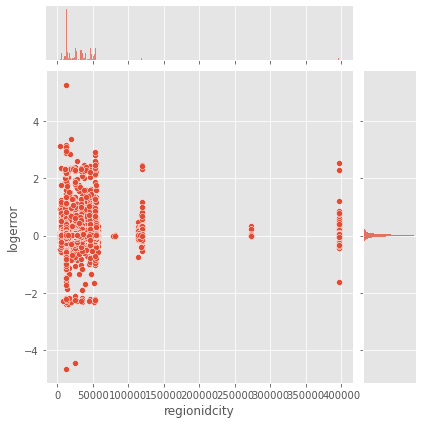

In [9]:
# Is there a correlation between log error and city?
sns.jointplot(y='logerror', x='regionidcity', data=df)

In [10]:
#pearons correlation between log error and city
df.corr()['logerror']['regionidcity']


0.002794671971882112

## 3. Is there a correlation between log error and propertylandusedesc?

<Figure size 1440x1440 with 0 Axes>

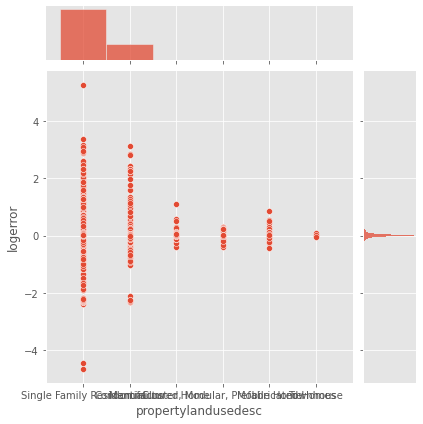

In [11]:
# Is there a correlation between log error and propertylandusedesc?
#change figure size
plt.figure(figsize=(20,20))
sns.jointplot(y='logerror', x='propertylandusedesc', data=df)
plt.show()


Text(0.5, 1.0, 'Mean Log Error by Property Land Use Desc')

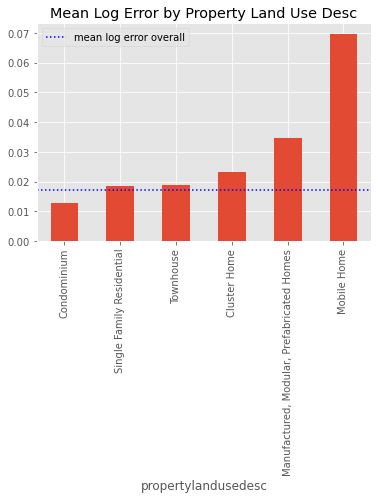

In [12]:
# make a bar chart showing the log error by propertylandusedesc
df.groupby('propertylandusedesc').logerror.mean().sort_values().plot(kind='bar')
# add horizontal line at mean log error
plt.axhline(y=df.logerror.mean(), color='b', linestyle=':')
# add legend
plt.legend(['mean log error overall'])
# add title
plt.title('Mean Log Error by Property Land Use Desc')


Text(0.5, 1.0, 'Median Log Error by Property Land Use Desc')

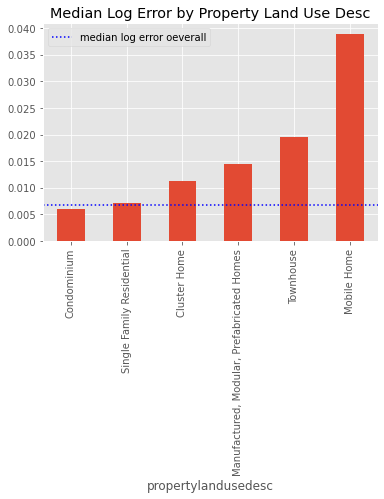

In [13]:
# create a bar chart showing the log error by propertylandusedesc by median
df.groupby('propertylandusedesc').logerror.median().sort_values().plot(kind='bar')
# add horizontal line at median log error
plt.axhline(y=df.logerror.median(), color='b', linestyle=':')
# add legend
plt.legend(['median log error oeverall'])
# add title
plt.title('Median Log Error by Property Land Use Desc')



## Is there a correlation between log error and roomcnt?

Text(0.5, 1.0, 'Log Error by Room Count')

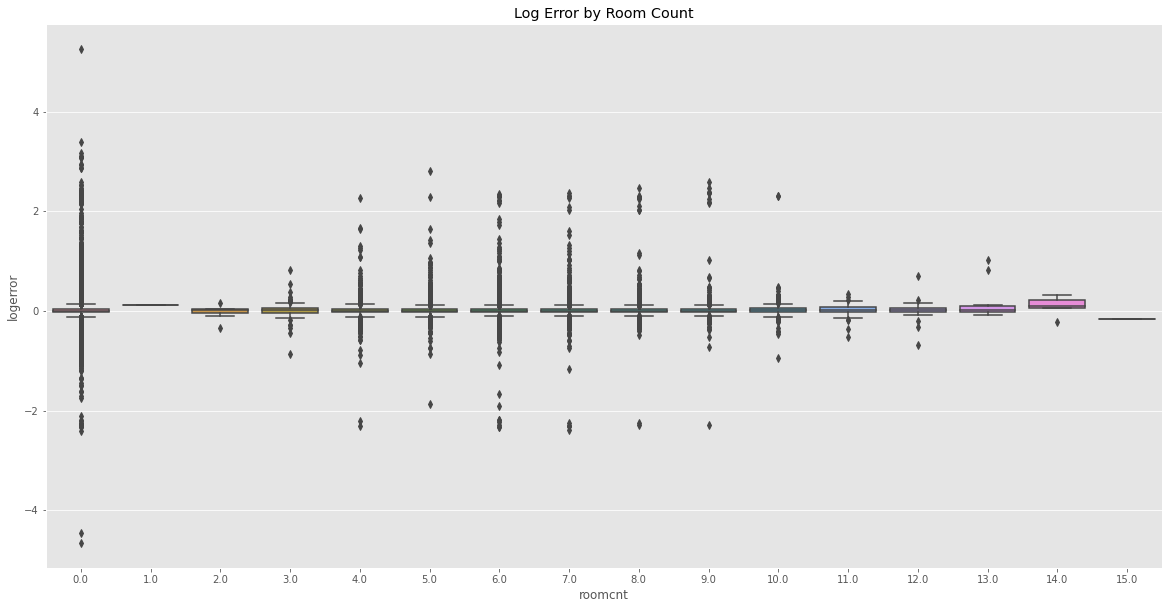

In [14]:
# make a box plot between log error and roomcnt
# change figure size
plt.figure(figsize=(20,10))
sns.boxplot(y='logerror', x='roomcnt', data=df)
# add title
plt.title('Log Error by Room Count')

In [15]:
def detect_outliers(df, col, k=1.5):
    """look for outliers in a column of a dataframe using IQR, k"""
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * k)
    upper_bound = q3 + (iqr * k)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

def remove_outliers(df, k=1.5):
    """remove outliers from all quantitative variables"""
    for col in df.select_dtypes(include=["int64", "float64"]).columns:
        df = df[~df[col].index.isin(detect_outliers(df, col, k).index)]
    return df

In [16]:
df2 = remove_outliers(df)

In [17]:
df.roomcnt.describe()



count    68605.000000
mean         1.611530
std          2.925089
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: roomcnt, dtype: float64

In [18]:
df2.roomcnt.describe()

count    22293.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: roomcnt, dtype: float64

Text(0.5, 1.0, 'Log Error by Room Count')

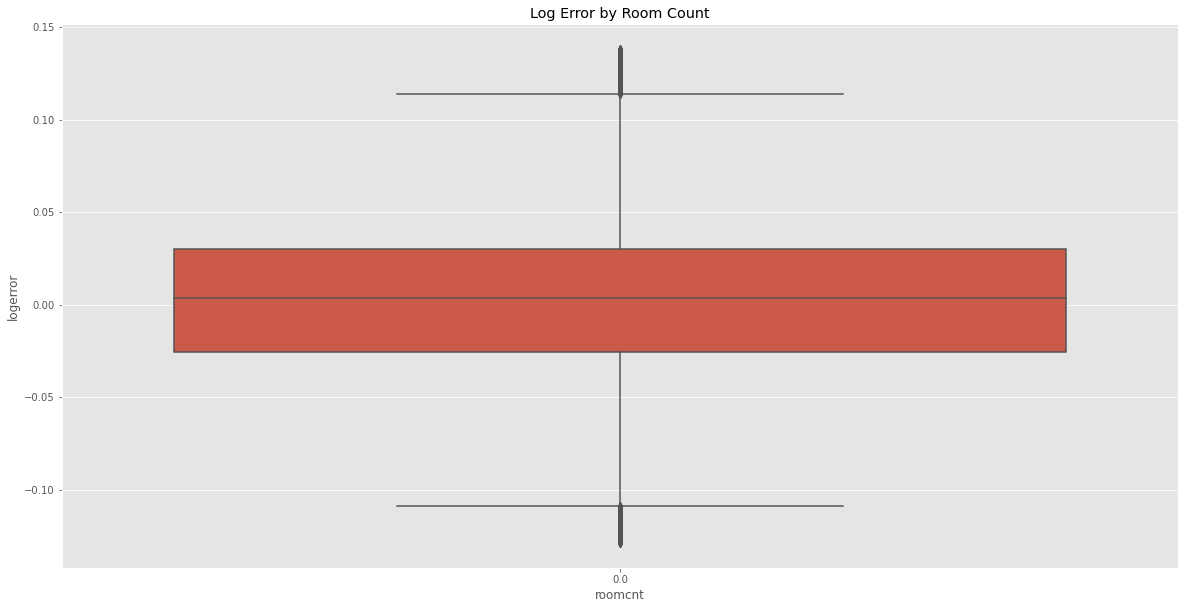

In [19]:
# make a box plot between log error and roomcnt
# change figure size
plt.figure(figsize=(20,10))
sns.boxplot(y='logerror', x='roomcnt', data=df2)
# add title
plt.title('Log Error by Room Count')

Text(0.5, 1.0, 'Log Error by Room Count')

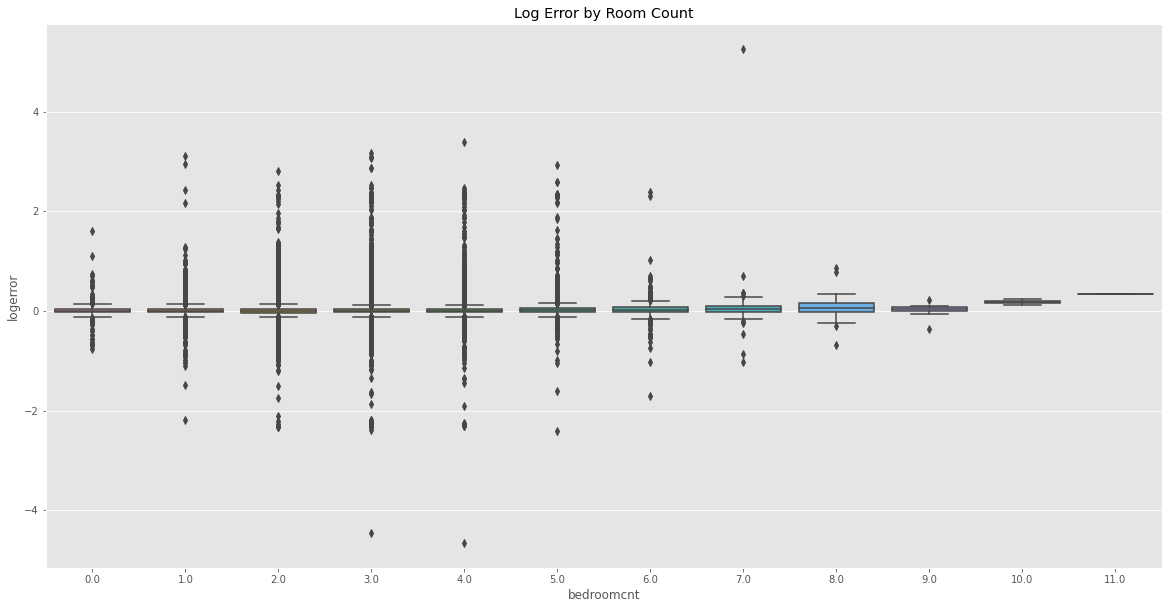

In [20]:
# make a box plot between log error and bedroomcnt
# change figure size
plt.figure(figsize=(20,10))
sns.boxplot(y='logerror', x='bedroomcnt', data=df)
# add title
plt.title('Log Error by Room Count')

Text(0.5, 1.0, 'Log Error by Room Count')

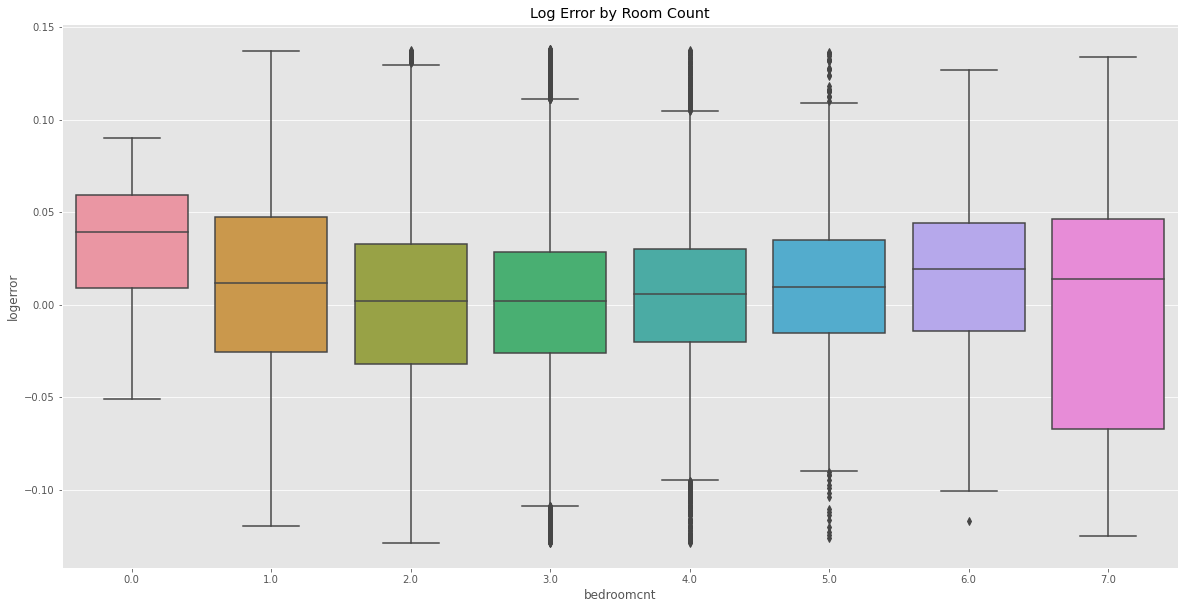

In [21]:
# make a box plot between log error and bedroomcnt
# change figure size
plt.figure(figsize=(20,10))
sns.boxplot(y='logerror', x='bedroomcnt', data=df2)
# add title
plt.title('Log Error by Room Count')

Text(0.5, 1.0, 'Log Error by Room Count')

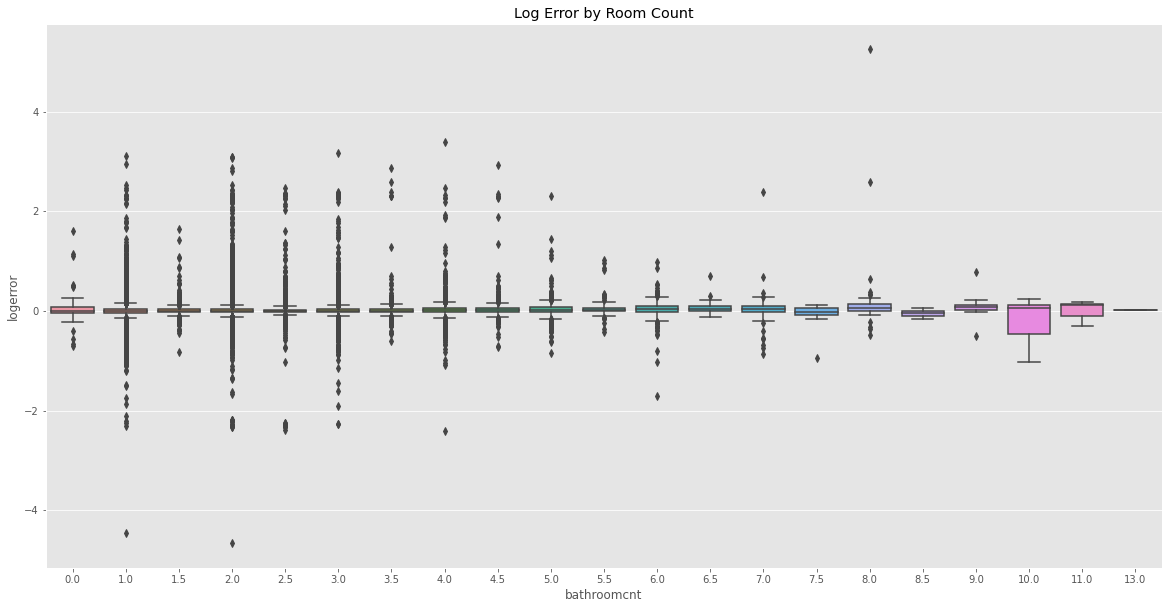

In [22]:
# make a box plot between log error and bathroomcnt
# change figure size
plt.figure(figsize=(20,10))
sns.boxplot(y='logerror', x='bathroomcnt', data=df)
# add title
plt.title('Log Error by Room Count')

Text(0.5, 1.0, 'Log Error by Room Count')

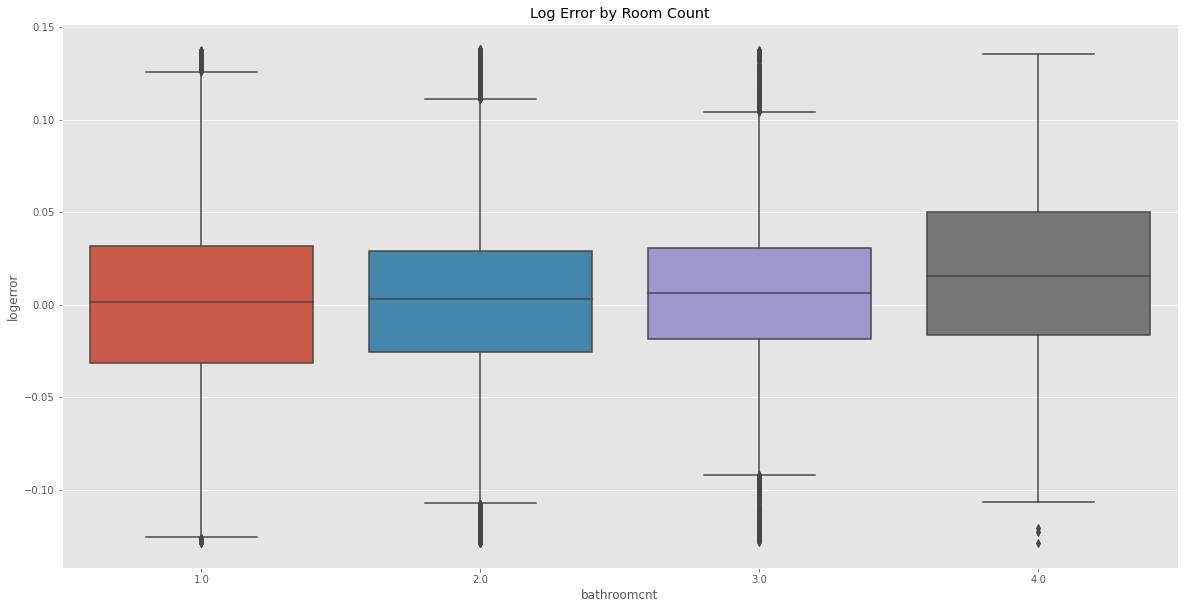

In [23]:
# make a box plot between log error and bathroomcnt
# change figure size
plt.figure(figsize=(20,10))
sns.boxplot(y='logerror', x='bathroomcnt', data=df2)
# add title
plt.title('Log Error by Room Count')

Text(0.5, 1.0, 'Log Error by finished square feet')

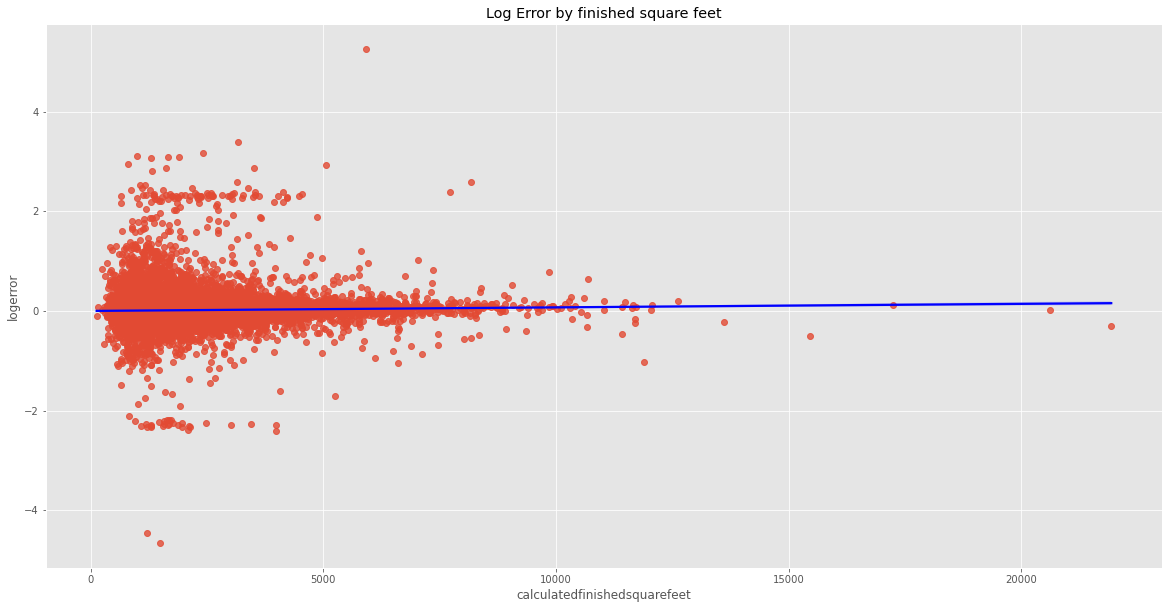

In [24]:
# make a regplot between log error and calculatedfinishedsquarefeet
# change figure size
plt.figure(figsize=(20,10))
sns.regplot(y='logerror', x='calculatedfinishedsquarefeet', data=df, line_kws={"color": "blue"})
# add title
plt.title('Log Error by finished square feet')

Text(0.5, 1.0, 'Log Error by finished square feet')

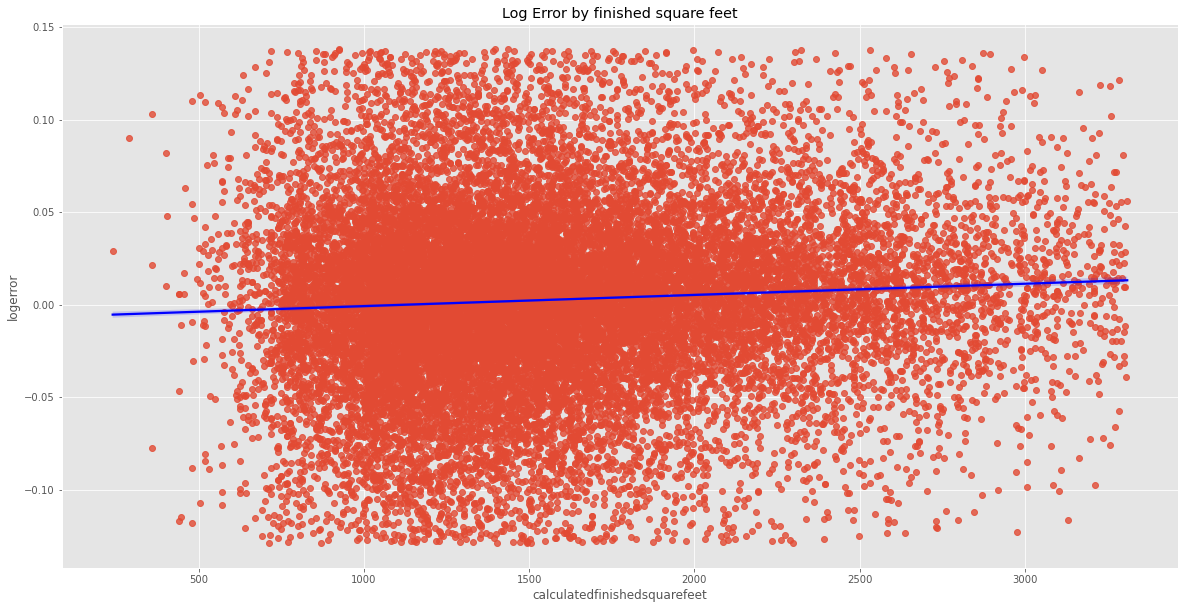

In [25]:
# make a regplot between log error and calculatedfinishedsquarefeet
# change figure size
plt.figure(figsize=(20,10))
sns.regplot(y='logerror', x='calculatedfinishedsquarefeet', data=df2, line_kws={"color": "blue"})
# add title
plt.title('Log Error by finished square feet')


Text(0.5, 1.0, 'Log Error by year built')

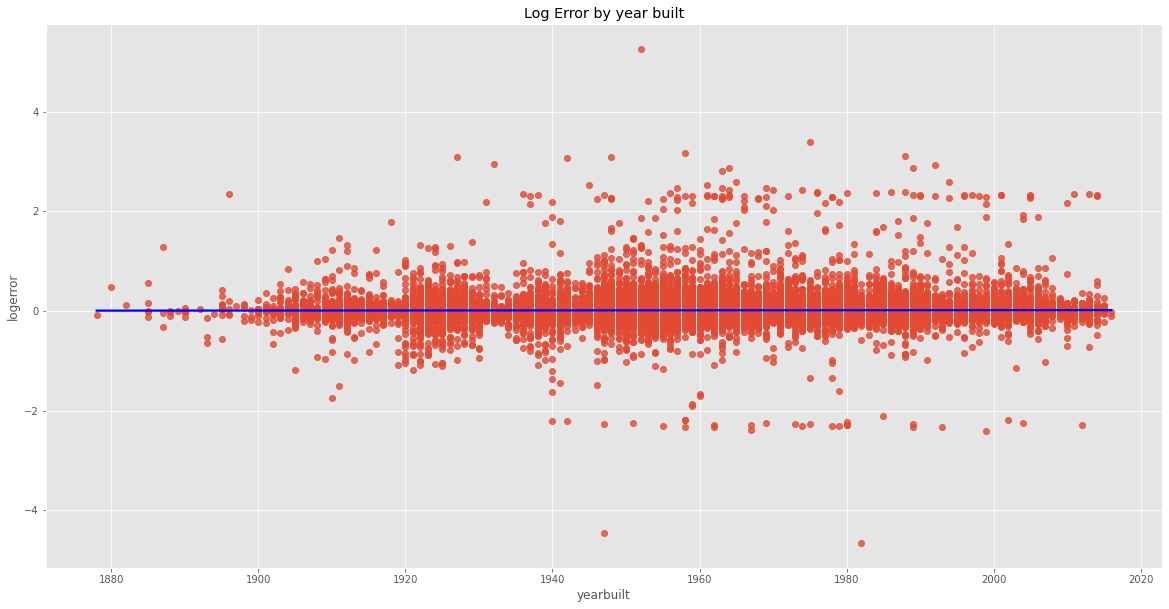

In [26]:
# make a regplot between log error and yearbuilt
# change figure size
plt.figure(figsize=(20,10))
sns.regplot(y='logerror', x='yearbuilt', data=df, line_kws={"color": "blue"})
# add title
plt.title('Log Error by year built')


Text(0.5, 1.0, 'Log Error by year built')

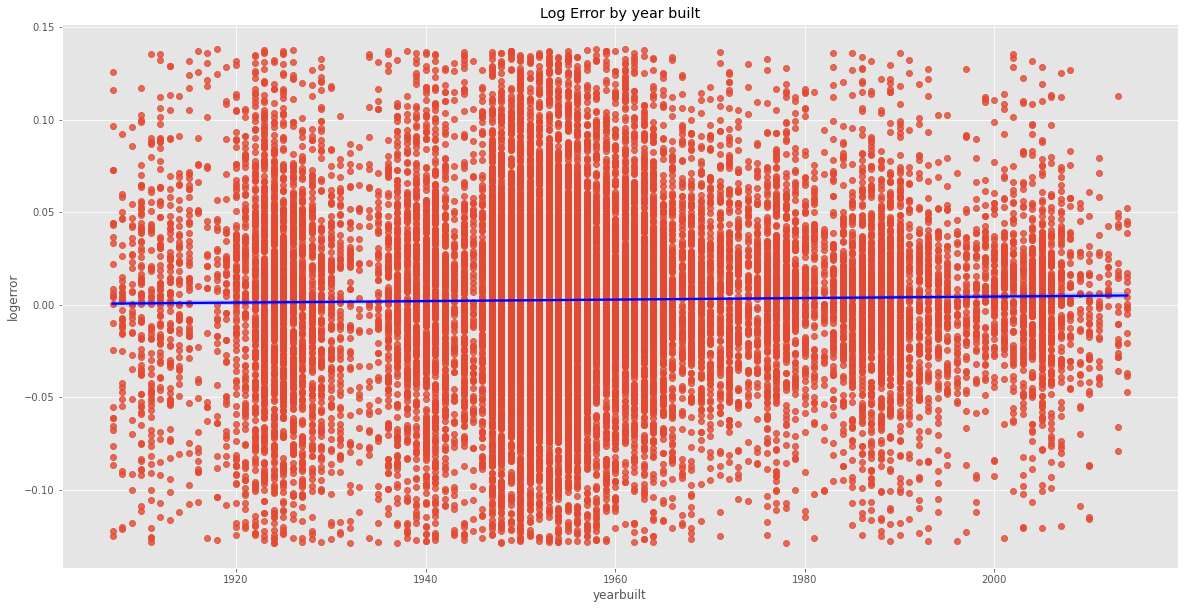

In [27]:
# make a regplot between log error and yearbuilt
# change figure size
plt.figure(figsize=(20,10))
sns.regplot(y='logerror', x='yearbuilt', data=df2, line_kws={"color": "blue"})
# add title
plt.title('Log Error by year built')

In [28]:
# how many rows have roomcnt < (bathroomcnt + bedroomcnt)
df[df['roomcnt'] < (df['bathroomcnt'] + df['bedroomcnt'])].shape[0]

52907

In [29]:
df.roomcnt.value_counts()

0.0     51740
6.0      4376
7.0      3771
8.0      2852
5.0      2726
4.0      1271
9.0      1184
10.0      339
3.0       181
11.0      105
12.0       33
13.0       10
2.0        10
14.0        5
1.0         1
15.0        1
Name: roomcnt, dtype: int64